<a href="https://colab.research.google.com/github/nafisamukhtar/youtube_adview_prediction/blob/main/ADVIEW_PREDCITION_ML_INTERNSHIP_NEO_NAFISA_MUKHTAR_M.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Mount drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import libraries 
#numpy- to work with array
#pandas - to work with datamanipulation and daatframe
#matplotlib - to work with visualization of data
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
# Importing data
#path = "" # Put path of your folder of your data if it's not in the same folder
data_train = pd.read_csv("/content/drive/MyDrive/train.csv")
data_train.head() #head()-prints first five rows of the datset
data_train.shape #shape()-prints row and column count

(14999, 9)

In [ ]:
print(data_train) #printing the dataset to analyse the features

           vidid  adview    views likes  ... comment   published duration category
0      VID_18655      40  1031602  8523  ...    1095  2016-09-14  PT7M37S        F
1      VID_14135       2     1707    56  ...       6  2016-10-01  PT9M30S        D
2       VID_2187       1     2023    25  ...       2  2016-07-02  PT2M16S        C
3      VID_23096       6   620860   777  ...     153  2016-07-27  PT4M22S        H
4      VID_10175       1      666     1  ...       0  2016-06-29    PT31S        D
...          ...     ...      ...   ...  ...     ...         ...      ...      ...
14994     VID_31       2   525949  1137  ...      86  2015-05-18  PT6M10S        A
14995   VID_5861       1   665673  3849  ...     569  2015-10-20  PT3M56S        D
14996    VID_805       4     3479    16  ...       1  2013-08-23  PT3M13S        B
14997  VID_19843       1      963     0  ...       0  2010-10-02    PT26S        G
14998   VID_8534       1    15212    22  ...       4  2016-02-19   PT1M1S        D

[14

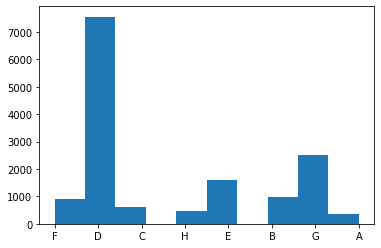

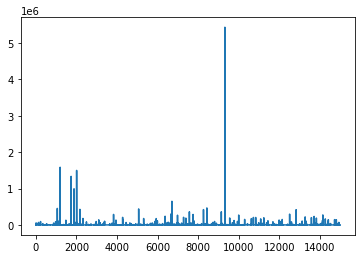

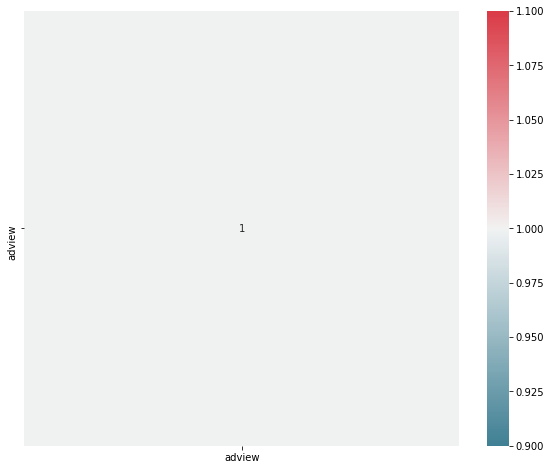

In [ ]:
# Visualization
# Individual Plots
plt.hist(data_train["category"])
plt.show()
plt.plot(data_train["adview"])
plt.show()
# Remove videos with adview greater than 2000000 as outlier
data_train = data_train[data_train["adview"] <2000000]
# Heatmap
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 8))
corr = data_train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
square=True, ax=ax,annot=True)
plt.show()

In [ ]:
# Removing character "F" present in data
#this is done to remove the missing characters in the dataset
data_train=data_train[data_train.views!='F']
data_train=data_train[data_train.likes!='F']
data_train=data_train[data_train.dislikes!='F']
data_train=data_train[data_train.comment!='F']
data_train.head()
# Assigning each category a number for Category feature i.e A to 1,B to 2 and so on...
category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data_train["category"]=data_train["category"].map(category)
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


In [ ]:
#Convert values to integers for views, likes, comments, dislikes and adview
data_train["views"] = pd.to_numeric(data_train["views"])
data_train["comment"] = pd.to_numeric(data_train["comment"])
data_train["likes"] = pd.to_numeric(data_train["likes"])
data_train["dislikes"] = pd.to_numeric(data_train["dislikes"])
data_train["adview"]=pd.to_numeric(data_train["adview"])
column_vidid=data_train['vidid']
# Endoding features like Category, Duration, Vidid
from sklearn.preprocessing import LabelEncoder
data_train['duration']=LabelEncoder().fit_transform(data_train['duration'])
data_train['vidid']=LabelEncoder().fit_transform(data_train['vidid'])
data_train['published']=LabelEncoder().fit_transform(data_train['published'])
data_train.head()


,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,2925,6
1,2741,2,1707,56,2,6,2185,3040,4
2,8138,1,2023,25,0,2,2094,1863,3
3,9004,6,620860,777,161,153,2119,2546,8
4,122,1,666,1,0,0,2091,1963,4


In [ ]:
# Convert Time_in_sec for duration
import datetime
import time
def checki(x):
   y = x[2:]
   h = ''
   m = ''
   s = ''
   mm = ''
   P = ['H','M','S']
   for i in y:
     if i not in P:
       mm+=i
     else:
       if(i=="H"):
         h = mm
         mm = ''
       elif(i == "M"):
         m = mm
         mm = ''
       else:
         s = mm
         mm = ''
   if(h==''):
     h = '00'
   if(m == ''):
     m = '00'
   if(s==''):
     s='00'
   bp = h+':'+m+':'+s
   return bp
train=pd.read_csv("/content/drive/MyDrive/train.csv")
mp = pd.read_csv( "/content/drive/MyDrive/train.csv")["duration"]
time = mp.apply(checki)
def func_sec(time_string):
   h, m, s = time_string.split(':')
   return int(h) * 3600 + int(m) * 60 + int(s)
time1=time.apply(func_sec)
data_train["duration"]=time1
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,457,6
1,2741,2,1707,56,2,6,2185,570,4
2,8138,1,2023,25,0,2,2094,136,3
3,9004,6,620860,777,161,153,2119,262,8
4,122,1,666,1,0,0,2091,31,4


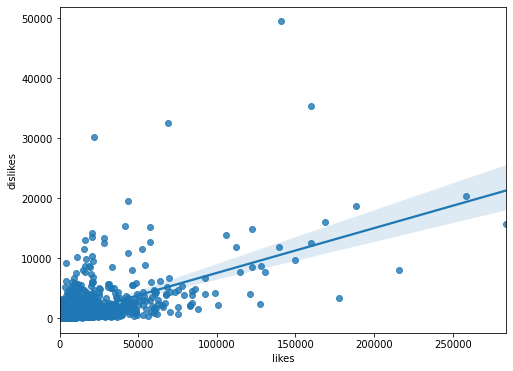

In [ ]:
fig,ax = plt.subplots(figsize=(8,6))
sns.regplot(x = 'likes', y='dislikes',data=data_train,ax=ax) #regplot for two parameters of the train dataset

              vidid    adview     views  ...  published  duration  category
vidid      1.000000 -0.031081 -0.047582  ...  -0.144474  0.006912 -0.038894
adview    -0.031081  1.000000  0.031177  ...   0.055657 -0.019592 -0.004910
views     -0.047582  0.031177  1.000000  ...   0.020110  0.002563  0.032822
likes     -0.128861  0.046541  0.726599  ...   0.096941 -0.042518 -0.009175
dislikes  -0.076461  0.016686  0.730216  ...   0.043745  0.001587  0.011355
comment   -0.081060  0.017631  0.410597  ...   0.114253 -0.037478 -0.034107
published -0.144474  0.055657  0.020110  ...   1.000000  0.011976 -0.056814
duration   0.006912 -0.019592  0.002563  ...   0.011976  1.000000  0.049235
category  -0.038894 -0.004910  0.032822  ...  -0.056814  0.049235  1.000000

[9 rows x 9 columns]


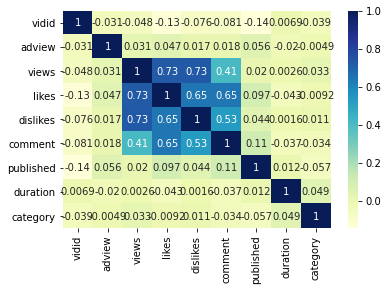

In [ ]:
# prints data that will be plotted 
# columns shown here are selected by corr() since they are ideal for the plot 
print(data_train.corr()) 
  
# plotting correlation heatmap 
dataplot = sns.heatmap(data_train.corr(), cmap="YlGnBu", annot=True) 
  
# displaying heatmap 
plt.show() 

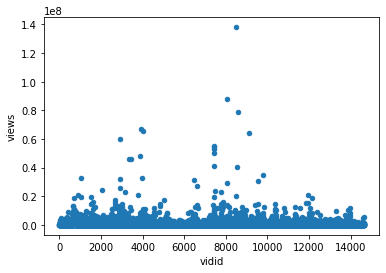

In [ ]:
# The first way we can plot things is using the .plot extension from Pandas dataframes
# We'll use this to make a scatterplot of the features present in  the traning dataset.
data_train.plot(kind="scatter", x="vidid", y="views")

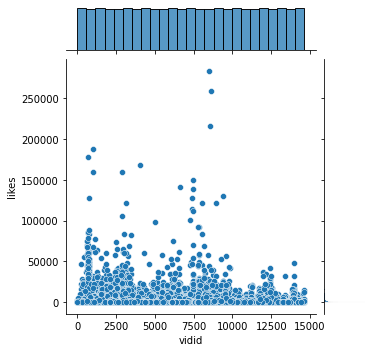

In [ ]:
# We can also use the seaborn library to make a similar plot
# A seaborn jointplot shows bivariate scatterplots and univariate histograms in the same figure
sns.jointplot(x="vidid", y="likes", data=data_train,height=5)

In [ ]:
# Split Data and drop specific columns 
Y_train = pd.DataFrame(data = data_train.iloc[:, 1].values, columns = ['target'])
data_train=data_train.drop(["adview"],axis=1)
data_train.head()
#splitting the dataset into train and test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_train, Y_train, test_size=0.2, random_state=42)
X_train.shape
# Normalise Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#The MinMaxScaler transforms the features by scaling them to a given range
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
X_train.mean()

0.21445701548059948

In [ ]:
data_train
data_train.shape #printing the shape after preprocessing the data

(14636, 8)

In [ ]:
# Evaluation Metrics
from sklearn import metrics
#defining a function to print mean absolute error,mean squared error and root mean squared error
def print_error(X_test, y_test, model_name):
 prediction = model_name.predict(X_test)
 print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
 print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
 print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

In [ ]:
# Linear Regression
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)
print_error(X_test,y_test, linear_regression)


Mean Absolute Error: 3727.4793234398294
Mean Squared Error: 834848577.7931217
Root Mean Squared Error: 28893.74634402956


In [ ]:
# Support Vector Regressor
from sklearn.svm import SVR
supportvector_regressor = SVR()
supportvector_regressor.fit(X_train,y_train)
print_error(X_test,y_test,supportvector_regressor)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Absolute Error: 1696.939651284359
Mean Squared Error: 833685622.805953
Root Mean Squared Error: 28873.61464738963


In [ ]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
print_error(X_test,y_test, decision_tree)

Mean Absolute Error: 2203.60075136612
Mean Squared Error: 562183198.243511
Root Mean Squared Error: 23710.402743173952


In [ ]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
n_estimators = 200
max_depth = 25
min_samples_split=15
min_samples_leaf=2
random_forest = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, min_samples_split=min_samples_split)
random_forest.fit(X_train,y_train)
print_error(X_test,y_test, random_forest)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Mean Absolute Error: 3289.116249551468
Mean Squared Error: 632957571.2973855
Root Mean Squared Error: 25158.648041923585


In [ ]:
# Artificial Neural Network
import keras
from keras.layers import Dense
ann = keras.models.Sequential([
Dense(6, activation="relu",
input_shape=X_train.shape[1:]),
Dense(6,activation="relu"),
Dense(1)
])
optimizer=keras.optimizers.Adam()
loss=keras.losses.mean_squared_error
ann.compile(optimizer=optimizer,loss=loss,metrics=["mean_squared_error"])

In [ ]:
history=ann.fit(X_train,y_train,epochs=100)
ann.summary()
print_error(X_test,y_test,ann)


Epoch 1/100
366/366 [==============================] - 0s 917us/step - loss: 767406784.0000 - mean_squared_error: 767406784.0000
Epoch 2/100
366/366 [==============================] - 0s 919us/step - loss: 767402432.0000 - mean_squared_error: 767402432.0000
Epoch 3/100
366/366 [==============================] - 0s 891us/step - loss: 767392512.0000 - mean_squared_error: 767392512.0000
Epoch 4/100
366/366 [==============================] - 0s 901us/step - loss: 767372160.0000 - mean_squared_error: 767372160.0000
Epoch 5/100
366/366 [==============================] - 0s 945us/step - loss: 767339712.0000 - mean_squared_error: 767339712.0000
Epoch 6/100
366/366 [==============================] - 0s 952us/step - loss: 767295936.0000 - mean_squared_error: 767295936.0000
Epoch 7/100
366/366 [==============================] - 0s 907us/step - loss: 767238272.0000 - mean_squared_error: 767238272.0000
Epoch 8/100
366/366 [==============================] - 0s 936us/step - loss: 767167936.0000 - mea

In [ ]:
#Saving Scikitlearn models
import joblib
joblib.dump(decision_tree, "decision_treeadview.pkl")
# Saving Keras Artificial Neural Network model
ann.save("ann_youtubeadview.h5")

In [ ]:
#reading the test dataset
test=pd.read_csv("/content/drive/MyDrive/test.csv")

In [ ]:
#printing first five entries of the test dataset
test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


In [ ]:
#printing row and column count of the test dataset
test.shape

(8764, 8)

In [ ]:
# Removing character "F" present in data
#this is done to remove the missing characters in the dataset
test=test[test.views!='F']
test=test[test.likes!='F']
test=test[test.dislikes!='F']
test=test[test.comment!='F']
test.head()
# Assigning each category a number for Category feature i.e A to 1,B to 2 and so on...
category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
test["category"]=test["category"].map(category)
test.head()


,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,2
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,6
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,4
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,7
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,2


In [ ]:
#Convert values to integers for views, likes, comments, dislikes and adview
test["views"] = pd.to_numeric(test["views"])
test["comment"] = pd.to_numeric(test["comment"])
test["likes"] = pd.to_numeric(test["likes"])
test["dislikes"] = pd.to_numeric(test["dislikes"])
#test["adview"]=pd.to_numeric(test["adview"])
column_vidid=test['vidid']
# Endoding features like Category, Duration, Vidid
from sklearn.preprocessing import LabelEncoder
test['duration']=LabelEncoder().fit_transform(test['duration'])
test['vidid']=LabelEncoder().fit_transform(test['vidid'])
test['published']=LabelEncoder().fit_transform(test['published'])
test.head()


,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,2115,2
1,3444,1040132,8171,340,1047,1825,2055,6
2,1593,28534,31,11,1,1009,1506,4
3,3775,1316715,2284,250,274,116,2265,7
4,7644,1893173,2519,225,116,1892,1625,2


In [ ]:
# Convert Time_in_sec for duration
import datetime
import time
def checki(x):
   y = x[2:]
   h = ''
   m = ''
   s = ''
   mm = ''
   P = ['H','M','S']
   for i in y:
     if i not in P:
       mm+=i
     else:
       if(i=="H"):
         h = mm
         mm = ''
       elif(i == "M"):
         m = mm
         mm = ''
       else:
         s = mm
         mm = ''
   if(h==''):
     h = '00'
   if(m == ''):
     m = '00'
   if(s==''):
     s='00'
   bp = h+':'+m+':'+s
   return bp
train=pd.read_csv("/content/drive/MyDrive/test.csv")
mp = pd.read_csv( "/content/drive/MyDrive/test.csv")["duration"]
time = mp.apply(checki)
def func_sec(time_string):
   h, m, s = time_string.split(':')
   return int(h) * 3600 + int(m) * 60 + int(s)
time1=time.apply(func_sec)
test["duration"]=time1
test.head()


,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,449,2
1,3444,1040132,8171,340,1047,1825,389,6
2,1593,28534,31,11,1,1009,2274,4
3,3775,1316715,2284,250,274,116,595,7
4,7644,1893173,2519,225,116,1892,188,2


In [ ]:
# Split Data and drop specific columns 
Ytrain = pd.DataFrame(data = test.iloc[:, 1].values, columns = ['target'])
#test=test.drop(["adview"],axis=1)
test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,449,2
1,3444,1040132,8171,340,1047,1825,389,6
2,1593,28534,31,11,1,1009,2274,4
3,3775,1316715,2284,250,274,116,595,7
4,7644,1893173,2519,225,116,1892,188,2


In [ ]:
#splitting the dataset into train and test 
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, ytest = train_test_split(test, Ytrain, test_size=0.2, random_state=42)
Xtrain

,vidid,views,likes,dislikes,comment,published,duration,category
764,783,1511094,14656,1704,765,1902,337,4
3615,1999,810581,6010,117,240,1474,30,4
2257,6150,1066727,1328,258,77,1975,620,4
8028,4949,763316,4317,189,359,1444,244,7
3462,1018,178706,409,21,89,531,318,4
...,...,...,...,...,...,...,...,...
5881,7122,985837,2212,218,74,1014,647,4
5322,4946,83362,629,6,29,1641,300,7
5529,6859,345295,1785,82,182,1410,199,4
875,8223,197700,2771,156,110,2067,136,4


In [ ]:
# Normalise Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#The MinMaxScaler transforms the features by scaling them to a given range
Xtrain=scaler.fit_transform(Xtrain)
Xtest=scaler.fit_transform(Xtest)
Xtrain.mean()

0.21052439011735335

In [ ]:
from sklearn.externals import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(decision_tree, 'decision_treeadview.pkl') 
  
# Load the model from the file 
decision_tree_from_joblib = joblib.load('decision_treeadview.pkl')  

In [ ]:
#here we hvae used Xtrain from the test.csv to make predictions
res=decision_tree_from_joblib.predict(Xtrain)
print(res) 

[79.  1.  1. ...  2.  2.  1.]


In [ ]:
from numpy import asarray
from numpy import savetxt
# define data
data = res
# save to csv file
savetxt('predictedadview.csv', data, delimiter=',')

In [ ]:
#displaying the first 200 predicted values 
df=pd.read_csv("/content/predictedadview.csv")
print(df.head(200))

     7.900000000000000000e+01
0                         1.0
1                         1.0
2                     13350.0
3                         3.0
4                        47.0
..                        ...
195                      11.0
196                       1.0
197                       1.0
198                       1.0
199                   35894.0

[200 rows x 1 columns]


In [ ]:
#displaying predictions directly form test dataset
result=decision_tree_from_joblib.predict(test)
print(result) 

[58. 58. 58. ... 58. 58. 58.]
